Import lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pypyodbc as odbc

import data from sql

In [2]:
Driver_name = 'SQL Server'
Server_name = 'OSAMA\SQLEXPRESS'
Database_name = 'osama'
Connection_string = f'Driver={{{Driver_name}}};Server={Server_name};Database={Database_name};Trusted_Connection=yes;'
conn = odbc.connect(Connection_string)
cursor = conn.cursor()
query = "SELECT * FROM Flipkart"
df = pd.read_sql(query, conn)

df.head()

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Admin\AppData\Local\Temp\ipykernel_29832\3785250512.py:2: SyntaxWarning: invalid escape sequence '\S'
  Server_name = 'OSAMA\SQLEXPRESS'
C:\Users\Admin\AppData\Local\Temp\ipykernel_29832\3785250512.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,orderdate,orderid,delivery_date,customerid,customer_age,customer_gender,location,zone,delivery_type,product_category,subcategory,product,unit_price,shipping_fee,order_quantity,sale_price,status,reason,rating
0,2020-05-31,5136486,2020-06-04,230569424,57,M,Western,Zone 3,Express,Fashion,Girl's fashion,Fashion Girl's Dress Kids Children Newborn Bab...,147,10,2,196,Returned,Onsite -Description mismatch,2
1,2020-05-31,5136457,2020-06-12,230568182,24,F,Western,Zone 3,Standard Delivery,Health and beauty,Medical supplies and Equipment,Blood Pressure Monitor Digital Wrist BP Pulse ...,131,4,7,183,Returned,Product - Not fitting expectation,2
2,2020-05-31,5136465,2020-06-10,230567584,31,M,Weija,Zone 2,Standard Delivery,Health and beauty,Medical supplies and Equipment,Portable Blood Pressure Monitor - White,69,6,10,205,Delivered,None,3
3,2020-05-31,5136488,2020-06-05,230563788,62,F,Greater Accra,Zone 1,Express,Phones and Tablet,Mobile phones,Samsung A3 Core Dual SIM - 16GB HDD - 1GB RAM ...,148,7,7,291,Delivered,None,1
4,2020-05-31,5136449,2020-06-10,230563726,18,F,Weija,Zone 2,Shipped from Abroad,Fashion,Boy's fashion,Boys Sneakers Casual Kids Sports Shoes-Gold,126,12,9,260,Delivered,None,3


**EDA**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133503 entries, 0 to 133502
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   orderdate         133503 non-null  object
 1   orderid           133503 non-null  int64 
 2   delivery_date     133503 non-null  object
 3   customerid        133503 non-null  int64 
 4   customer_age      133503 non-null  int64 
 5   customer_gender   133503 non-null  object
 6   location          133503 non-null  object
 7   zone              133503 non-null  object
 8   delivery_type     133503 non-null  object
 9   product_category  133503 non-null  object
 10  subcategory       133503 non-null  object
 11  product           133503 non-null  object
 12  unit_price        133503 non-null  int64 
 13  shipping_fee      133503 non-null  int64 
 14  order_quantity    133503 non-null  int64 
 15  sale_price        133503 non-null  int64 
 16  status            133503 non-null  obj

In [4]:
df['orderdate'] = pd.to_datetime(df['orderdate'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

In [5]:
df['order_month'] = df['orderdate'].dt.month
df.head()

,orderdate,orderid,delivery_date,customerid,customer_age,customer_gender,location,zone,delivery_type,product_category,subcategory,product,unit_price,shipping_fee,order_quantity,sale_price,status,reason,rating,order_month
0,2020-05-31,5136486,2020-06-04,230569424,57,M,Western,Zone 3,Express,Fashion,Girl's fashion,Fashion Girl's Dress Kids Children Newborn Bab...,147,10,2,196,Returned,Onsite -Description mismatch,2,5
1,2020-05-31,5136457,2020-06-12,230568182,24,F,Western,Zone 3,Standard Delivery,Health and beauty,Medical supplies and Equipment,Blood Pressure Monitor Digital Wrist BP Pulse ...,131,4,7,183,Returned,Product - Not fitting expectation,2,5
2,2020-05-31,5136465,2020-06-10,230567584,31,M,Weija,Zone 2,Standard Delivery,Health and beauty,Medical supplies and Equipment,Portable Blood Pressure Monitor - White,69,6,10,205,Delivered,None,3,5
3,2020-05-31,5136488,2020-06-05,230563788,62,F,Greater Accra,Zone 1,Express,Phones and Tablet,Mobile phones,Samsung A3 Core Dual SIM - 16GB HDD - 1GB RAM ...,148,7,7,291,Delivered,None,1,5
4,2020-05-31,5136449,2020-06-10,230563726,18,F,Weija,Zone 2,Shipped from Abroad,Fashion,Boy's fashion,Boys Sneakers Casual Kids Sports Shoes-Gold,126,12,9,260,Delivered,None,3,5


In [6]:
df.describe()

,orderdate,orderid,delivery_date,customerid,customer_age,unit_price,shipping_fee,order_quantity,sale_price,rating,order_month
count,133503,1.335030e+05,133503,1.335030e+05,133503.000000,133503.000000,133503.000000,133503.000000,133503.000000,133503.000000,133503.000000
mean,2018-07-03 08:44:06.951753984,5.087078e+06,2018-07-12 21:15:22.792746240,2.305156e+08,35.930129,99.919185,11.495607,5.336974,224.995094,2.730291,6.288053
min,2015-01-01 00:00:00,5.023455e+06,2015-01-03 00:00:00,2.304591e+08,17.000000,50.000000,3.000000,1.000000,150.000000,1.000000,1.000000
25%,2016-11-22 00:00:00,5.056844e+06,2016-12-03 00:00:00,2.304874e+08,28.000000,75.000000,7.000000,3.000000,187.000000,2.000000,3.000000
50%,2018-10-20 00:00:00,5.090226e+06,2018-10-29 00:00:00,2.305156e+08,35.000000,100.000000,11.000000,5.000000,225.000000,3.000000,6.000000
75%,2020-03-25 00:00:00,5.119800e+06,2020-04-03 00:00:00,2.305439e+08,43.000000,125.000000,16.000000,8.000000,263.000000,4.000000,9.000000
max,2020-12-31 00:00:00,5.136490e+06,2021-01-20 00:00:00,2.305721e+08,87.000000,150.000000,20.000000,10.000000,300.000000,5.000000,12.000000
std,NaN,3.442235e+04,NaN,3.262001e+04,11.029974,29.194562,5.188966,2.922736,43.565475,1.355919,3.440448


In [7]:
df.isna().sum()

orderdate               0
orderid                 0
delivery_date           0
customerid              0
customer_age            0
customer_gender         0
location                0
zone                    0
delivery_type           0
product_category        0
subcategory             0
product                 0
unit_price              0
shipping_fee            0
order_quantity          0
sale_price              0
status                  0
reason              98522
rating                  0
order_month             0
dtype: int64

In [8]:
df = df.drop(columns=['reason'])
df.head()

,orderdate,orderid,delivery_date,customerid,customer_age,customer_gender,location,zone,delivery_type,product_category,subcategory,product,unit_price,shipping_fee,order_quantity,sale_price,status,rating,order_month
0,2020-05-31,5136486,2020-06-04,230569424,57,M,Western,Zone 3,Express,Fashion,Girl's fashion,Fashion Girl's Dress Kids Children Newborn Bab...,147,10,2,196,Returned,2,5
1,2020-05-31,5136457,2020-06-12,230568182,24,F,Western,Zone 3,Standard Delivery,Health and beauty,Medical supplies and Equipment,Blood Pressure Monitor Digital Wrist BP Pulse ...,131,4,7,183,Returned,2,5
2,2020-05-31,5136465,2020-06-10,230567584,31,M,Weija,Zone 2,Standard Delivery,Health and beauty,Medical supplies and Equipment,Portable Blood Pressure Monitor - White,69,6,10,205,Delivered,3,5
3,2020-05-31,5136488,2020-06-05,230563788,62,F,Greater Accra,Zone 1,Express,Phones and Tablet,Mobile phones,Samsung A3 Core Dual SIM - 16GB HDD - 1GB RAM ...,148,7,7,291,Delivered,1,5
4,2020-05-31,5136449,2020-06-10,230563726,18,F,Weija,Zone 2,Shipped from Abroad,Fashion,Boy's fashion,Boys Sneakers Casual Kids Sports Shoes-Gold,126,12,9,260,Delivered,3,5


In [9]:
df.duplicated().sum()

20502

In [10]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [11]:
df = df[df['status'] != 'Returned']
df.head()

,orderdate,orderid,delivery_date,customerid,customer_age,customer_gender,location,zone,delivery_type,product_category,subcategory,product,unit_price,shipping_fee,order_quantity,sale_price,status,rating,order_month
2,2020-05-31,5136465,2020-06-10,230567584,31,M,Weija,Zone 2,Standard Delivery,Health and beauty,Medical supplies and Equipment,Portable Blood Pressure Monitor - White,69,6,10,205,Delivered,3,5
3,2020-05-31,5136488,2020-06-05,230563788,62,F,Greater Accra,Zone 1,Express,Phones and Tablet,Mobile phones,Samsung A3 Core Dual SIM - 16GB HDD - 1GB RAM ...,148,7,7,291,Delivered,1,5
4,2020-05-31,5136449,2020-06-10,230563726,18,F,Weija,Zone 2,Shipped from Abroad,Fashion,Boy's fashion,Boys Sneakers Casual Kids Sports Shoes-Gold,126,12,9,260,Delivered,3,5
6,2020-05-31,5136478,2020-06-20,230552632,43,M,Ashanti,Zone 3,Shipped from Abroad,Fashion,Girl's fashion,Fashion Girls' Patent Leather Stitching Shoes ...,79,8,4,188,Delivered,1,5
7,2020-05-31,5136477,2020-06-19,230550422,42,F,Ashanti,Zone 3,Shipped from Abroad,Health and beauty,Fragrances,Fragrance World Smart Black Eau de Parfum Spra...,50,9,9,260,Delivered,1,5


In [12]:
df['profit'] = (df['sale_price'] * df['order_quantity']) - (df['shipping_fee'] * df['order_quantity'])
df.head()

,orderdate,orderid,delivery_date,customerid,customer_age,customer_gender,location,zone,delivery_type,product_category,subcategory,product,unit_price,shipping_fee,order_quantity,sale_price,status,rating,order_month,profit
2,2020-05-31,5136465,2020-06-10,230567584,31,M,Weija,Zone 2,Standard Delivery,Health and beauty,Medical supplies and Equipment,Portable Blood Pressure Monitor - White,69,6,10,205,Delivered,3,5,1990
3,2020-05-31,5136488,2020-06-05,230563788,62,F,Greater Accra,Zone 1,Express,Phones and Tablet,Mobile phones,Samsung A3 Core Dual SIM - 16GB HDD - 1GB RAM ...,148,7,7,291,Delivered,1,5,1988
4,2020-05-31,5136449,2020-06-10,230563726,18,F,Weija,Zone 2,Shipped from Abroad,Fashion,Boy's fashion,Boys Sneakers Casual Kids Sports Shoes-Gold,126,12,9,260,Delivered,3,5,2232
6,2020-05-31,5136478,2020-06-20,230552632,43,M,Ashanti,Zone 3,Shipped from Abroad,Fashion,Girl's fashion,Fashion Girls' Patent Leather Stitching Shoes ...,79,8,4,188,Delivered,1,5,720
7,2020-05-31,5136477,2020-06-19,230550422,42,F,Ashanti,Zone 3,Shipped from Abroad,Health and beauty,Fragrances,Fragrance World Smart Black Eau de Parfum Spra...,50,9,9,260,Delivered,1,5,2259


Viulz

Text(0.5, 0, 'Product Category')

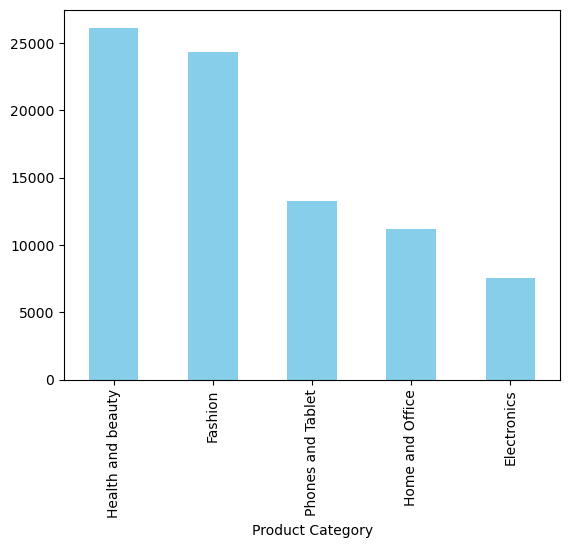

In [13]:
df['product_category'].value_counts()   .plot(kind='bar', color='skyblue')
plt.xlabel('Product Category')

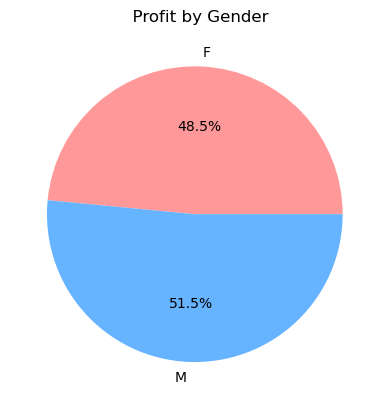

In [14]:
# حساب إجمالي المبيعات لكل جنس
sales_by_gender = df.groupby('customer_gender')['profit'].sum()

# رسم مخطط دائري
sales_by_gender.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.ylabel('')
plt.title('  Profit by Gender')
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_29832\3019495195.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='delivery_type', y='profit', data=sales_by_delivery_type, palette='viridis')


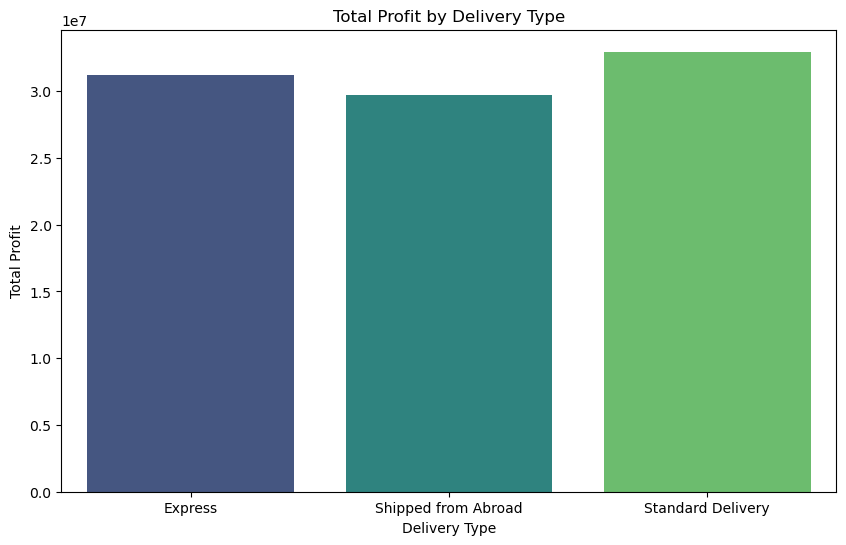

In [15]:

# Calculate total sale price by delivery type
sales_by_delivery_type = df.groupby('delivery_type', as_index=False)['profit'].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x='delivery_type', y='profit', data=sales_by_delivery_type, palette='viridis')
plt.title('Total Profit by Delivery Type')
plt.xlabel('Delivery Type')
plt.ylabel('Total Profit')
plt.show()